<a href="https://colab.research.google.com/github/K4zu/Machine-Learning---Python/blob/master/Perceptor_Wielowarstwowy%20-%20Liczby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist ## importowanie zestwu danych -> liczby 28 x 28
from keras.models import Sequential ## pozwala budowac modele sekwencyjne tak jak ukladanie na stosie
from keras.layers import Dense ## importowanie warstwy gestej warstwy, ktore stanowia nasz model
from keras.optimizers import RMSprop ## optymalizator 

## Załadowanie danych

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Eksploaracja danych

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba dabych treningowych:', X_train.shape[0])
print('Liczba danych testowych:', X_test.shape[0])
print('Rozmiar pojedynczego obrazka:', X_train[0].shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba dabych treningowych: 60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka: (28, 28)


(-0.5, 27.5, 27.5, -0.5)

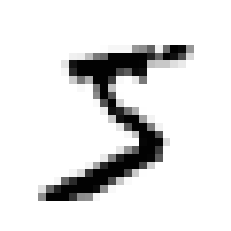

In [101]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

## Wyswietlanie kilku obrazkow

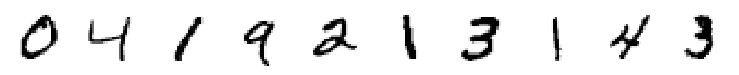

In [102]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='Greys')
plt.show()

### Przygotowanie danych

In [103]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

## Budowa modelu

In [105]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,))) ## dodawanie warstwy 
model.add(Dense(units=512, activation='relu')) ## warstwa ukryta
model.add(Dense(units=10, activation='softmax')) ## warstwa wyjsciowa, nie relu, chcemy aby zwrcilo nam prawdopodobienstwo poszczegolnych klas, nie sigmoid, bo mamy tych klas wiecej niz 2(czyli przyklad nie binarny)

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Trenowanie

In [108]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0073 - acc: 0.9982 - val_loss: 0.1293 - val_acc: 0.9843
Epoch 2/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0074 - acc: 0.9983 - val_loss: 0.1524 - val_acc: 0.9815
Epoch 3/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0041 - acc: 0.9991 - val_loss: 0.1651 - val_acc: 0.9825
Epoch 4/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0053 - acc: 0.9989 - val_loss: 0.1585 - val_acc: 0.9832
Epoch 5/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0060 - acc: 0.9988 - val_loss: 0.1489 - val_acc: 0.9823
Epoch 6/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0033 - acc: 0.9992 - val_loss: 0.1537 - val_acc: 0.9831
Epoch 7/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0044 - acc: 0.9991 - val_loss: 0.1497 - 

In [109]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 69us/step


[0.17042642689976373, 0.9836]

## Analiza wynikow

In [0]:
def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['acc'], history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()

In [0]:
make_accuracy_plot(history)

In [0]:
make_loss_plot(history)